In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *
import glob
from sklearn import neighbors

In [2]:
r_teachYP = []
g_teachYP = []
b_teachYP = []
size_teachYP = []

In [3]:
for filename in glob.glob('database/yellow plastic/teach/*.png'):
    # képek egyenként beolvasása
    image = Image.open(filename)
    im_array = np.array(image)
    
    # méret meghatározása
    im_array_gray = (np.array(image.convert("L")))
    im_bin = im_array_gray > im_array_gray.mean()
    size_teachYP.append(sum(im_bin))
    
    # az RGB színek középértéke
    r_teachYP.append(im_array[:,:,0].mean())
    g_teachYP.append(im_array[:,:,1].mean())
    b_teachYP.append(im_array[:,:,2].mean())

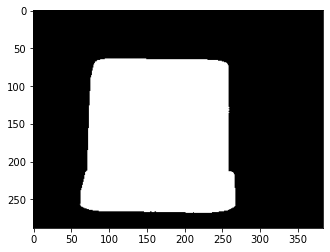

In [4]:
# utolsó kép plotolása, hogy lássuk hogyan is néz ki egy bináris kép a threshold után
plt.imshow(im_bin, 'gray')

In [5]:
# a képken szereplő objektumok mérete
size_teachYP
# nagyjából mindegyik egyforma méretű, ez nem meglepő, hiszen ugyanarról a képről van szó apróbb módosításokkal

[38034, 38036, 38026, 38091, 38005, 38020]

In [6]:
g_teachYP

[62.4671314380787,
 63.841507523148145,
 62.65773292824074,
 77.56668655960648,
 62.9720775462963,
 61.76866319444444]

In [7]:
r_teachM = []
g_teachM = []
b_teachM = []
size_teachM = []

In [8]:
for filename in glob.glob('database/MISC/teach/*.png'):
    # képek egyenként beolvasása
    image = Image.open(filename)
    im_array = np.array(image)
    
    # méret meghatározása
    im_array_gray = (np.array(image.convert("L")))
    im_bin = im_array_gray > im_array_gray.mean()
    size_teachM.append(sum(im_bin))
    
    # az RGB színek középértéke
    r_teachM.append(im_array[:,:,0].mean())
    g_teachM.append(im_array[:,:,1].mean())
    b_teachM.append(im_array[:,:,2].mean())

In [9]:
g_teachM

[42.73634620949074,
 36.24312789351852,
 27.68426287615741,
 12.387351707175926,
 23.03587962962963,
 23.163212528935187,
 24.763301142939813,
 30.128101490162038,
 18.972972728587962,
 10.427924262152779,
 21.483289930555557,
 13.09984447337963,
 12.008680555555555,
 39.99905960648148,
 11.550736038773149,
 13.77953197337963,
 21.841426142939813,
 30.17607964409722,
 18.234474464699073,
 11.66891818576389]

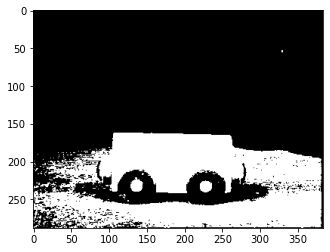

In [10]:
# utolsó kép plotolása, hogy lássuk hogyan is néz ki egy bináris kép a threshold után
plt.imshow(im_bin, 'gray')

In [11]:
# a képeken szereplő objektumok mérete
size_teachM

[34713,
 40812,
 14087,
 36052,
 8768,
 27840,
 13992,
 23371,
 8319,
 23136,
 14193,
 17711,
 13823,
 19357,
 31314,
 37232,
 11749,
 32231,
 10159,
 31339]

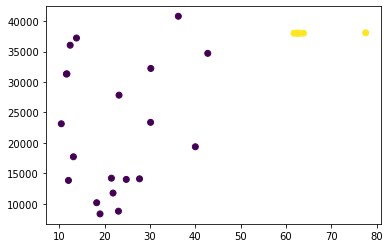

In [12]:
color_teachYP = np.ones(len(g_teachYP))*1 # a sárga kockák lesznek a True értékek
color_teachM = np.ones(len(g_teachM))*0 # minden más a False érték
green_teach_array = np.array(g_teachYP+g_teachM)
size_teach_array = np.array(size_teachYP+size_teachM)
# vízszintes tengely: green (a sárga játékkockán sok zöld színösszetevő van)
# függőleges tengely: méret
# a sárga kupac a sárga játékkocka, a lila kupac a MISC
plt.scatter(green_teach_array, size_teach_array, c = np.concatenate((color_teachYP, color_teachM)))

In [13]:
# knn search
knn_array = np.array((green_teach_array, size_teach_array))
targets = np.concatenate((color_teachYP, color_teachM))

knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(np.transpose(knn_array), targets)

np.transpose(targets)

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
# sárga kupac: 1
# lila kupac: 0
predicted = knn.predict([[62, 38034]])
predicted

array([1.])

In [15]:
xx, yy = np.meshgrid(np.linspace(10, 80, 280), np.linspace(8300, 42000, 1000))
xx, yy

(array([[10.        , 10.25089606, 10.50179211, ..., 79.49820789,
         79.74910394, 80.        ],
        [10.        , 10.25089606, 10.50179211, ..., 79.49820789,
         79.74910394, 80.        ],
        [10.        , 10.25089606, 10.50179211, ..., 79.49820789,
         79.74910394, 80.        ],
        ...,
        [10.        , 10.25089606, 10.50179211, ..., 79.49820789,
         79.74910394, 80.        ],
        [10.        , 10.25089606, 10.50179211, ..., 79.49820789,
         79.74910394, 80.        ],
        [10.        , 10.25089606, 10.50179211, ..., 79.49820789,
         79.74910394, 80.        ]]),
 array([[ 8300.        ,  8300.        ,  8300.        , ...,
          8300.        ,  8300.        ,  8300.        ],
        [ 8333.73373373,  8333.73373373,  8333.73373373, ...,
          8333.73373373,  8333.73373373,  8333.73373373],
        [ 8367.46746747,  8367.46746747,  8367.46746747, ...,
          8367.46746747,  8367.46746747,  8367.46746747],
        ...,


In [16]:
# mátrix pontjait vektorba alakítjuk
# sorfolytonos mátrixot csinál a 2D-ből
pPredict = knn.predict(np.c_[xx.ravel(), yy.ravel()])
xx.ravel(), yy.ravel(), pPredict

(array([10.        , 10.25089606, 10.50179211, ..., 79.49820789,
        79.74910394, 80.        ]),
 array([ 8300.,  8300.,  8300., ..., 42000., 42000., 42000.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [17]:
pPredict_matrix = pPredict.reshape(xx.shape)
pPredict_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<ipython-input-18-a90d6a3ffe10>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, pPredict_matrix, cmap='flag')


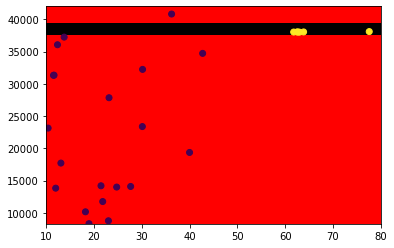

In [18]:
plt.pcolormesh(xx, yy, pPredict_matrix, cmap='flag')
plt.scatter(green_teach_array, size_teach_array, c = np.concatenate((color_teachYP, color_teachM)))

In [19]:
# teszt értékek beolvasása a yellow plastic-ból
g_testYP = []
size_testYP = []

In [20]:
for filename in glob.glob('database/yellow plastic/test/*.png'):
    # képek egyenként beolvasása
    image = Image.open(filename)
    im_array = np.array(image)
    
    # méret meghatározása
    im_array_gray = (np.array(image.convert("L")))
    im_bin = im_array_gray > im_array_gray.mean()
    size_testYP.append(sum(im_bin))
    
    # az RGB színek középértéke
    g_testYP.append(im_array[:,:,1].mean())

In [21]:
size_testYP, g_testYP

([38016, 38009, 38002, 38007, 38016, 38005],
 [62.351155598958336,
  61.857485170717595,
  62.065673828125,
  61.334517867476855,
  67.17073567708333,
  60.729049117476855])

In [22]:
# teszt értékek beolvasása a MISC-ből
g_testM = []
size_testM = []

In [23]:
for filename in glob.glob('database/MISC/test/*.png'):
    # képek egyenként beolvasása
    image = Image.open(filename)
    im_array = np.array(image)
    
    # méret meghatározása
    im_array_gray = (np.array(image.convert("L")))
    im_bin = im_array_gray > im_array_gray.mean()
    size_testM.append(sum(im_bin))
    
    # az RGB színek középértéke
    g_testM.append(im_array[:,:,1].mean())

In [24]:
size_testM, g_testM

([30915, 23630, 21107, 36065, 30091, 13945, 25630, 24653],
 [33.270833333333336,
  26.06199363425926,
  28.96612774884259,
  57.42822265625,
  22.034550419560187,
  14.42847583912037,
  11.937572337962964,
  35.677652994791664])

<ipython-input-25-5f1ef20b9bb4>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, pPredict_matrix, cmap='flag')


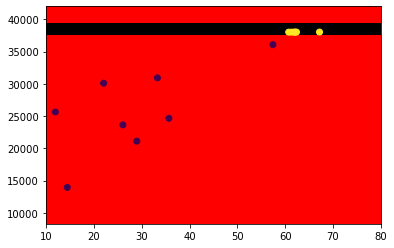

In [25]:
# osztályozás ábrázolása a teszt adatokon
color_testYP = np.ones(len(g_testYP))*1 # a sárga kockák lesznek a True értékek
color_testM = np.ones(len(g_testM))*0 # minden más a False érték
# a sárga kupac a sárga játékkocka, a lila kupac a MISC
plt.pcolormesh(xx, yy, pPredict_matrix, cmap='flag')
green_test_array = np.array(g_testYP+g_testM)
size_test_array = np.array(size_testYP+size_testM)
plt.scatter(green_test_array, size_test_array, c = np.concatenate((color_testYP, color_testM)))

In [26]:
actual_clasters_array = np.concatenate((color_testYP, color_testM))
predicted_clasters_array = []

# sárga kockák prediktálása
for i in range(len(g_testYP)):
    predicted_clasters_array.append(knn.predict([[g_testYP[i], size_testYP[i]]]))
    
for i in range(len(g_testM)):
    predicted_clasters_array.append(knn.predict([[g_testM[i], size_testM[i]]]))

actual_clasters_array, np.transpose(predicted_clasters_array), actual_clasters_array-np.transpose(predicted_clasters_array)

(array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

<b>A fenti összehasonlításból láthatjuk, hogy a két mátrix megegyezik, így a teszt értékeket is hibátlanul sorolta be a klaszterezés.</b>
$$True Positive = 6$$
$$False Negative = 0$$
$$False Positive = 0$$
$$True Negative = 8$$

<b>Így, mivel</b> $$szenzitivitás = \frac{TP}{TP+FN} = \frac{6}{6+0} = 100\%$$
<b>és</b> $$specificitás = \frac{TN}{TN+FP} = \frac{8}{8+0} = 100\%$$